In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/08/2020,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
1,26/08/2020,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
2,25/08/2020,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
3,24/08/2020,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
4,23/08/2020,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
...,...,...,...,...,...,...,...,...,...,...,...,...
38906,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38907,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38908,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38909,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)
covid.drop("geoId",axis=1,inplace=True)

In [6]:
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/08/2020,55,4,Afghanistan,Asia,2.053007
1,26/08/2020,1,0,Afghanistan,Asia,2.108210
2,25/08/2020,71,10,Afghanistan,Asia,2.670749
3,24/08/2020,0,0,Afghanistan,Asia,2.484112
4,23/08/2020,105,2,Afghanistan,Asia,2.484112
...,...,...,...,...,...,...
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/08/2020,55,4,Afghanistan,Asia,2.053007
1,26/08/2020,1,0,Afghanistan,Asia,2.108210
2,25/08/2020,71,10,Afghanistan,Asia,2.670749
3,24/08/2020,0,0,Afghanistan,Asia,2.484112
4,23/08/2020,105,2,Afghanistan,Asia,2.484112
...,...,...,...,...,...,...
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
38910,21/03/2020,1,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,23/08/2020,105,2,Afghanistan,Asia,2.484112
3,24/08/2020,0,0,Afghanistan,Asia,2.484112
2,25/08/2020,71,10,Afghanistan,Asia,2.670749
1,26/08/2020,1,0,Afghanistan,Asia,2.108210


In [10]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
38910,21/03/2020,1,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [11]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
17065,31/12/2019,0,0,India,Asia,NaN
17064,01/01/2020,0,0,India,Asia,NaN
17063,02/01/2020,0,0,India,Asia,NaN
17062,03/01/2020,0,0,India,Asia,NaN
17061,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
16830,23/08/2020,69239,912,India,Asia,65.275059
16829,24/08/2020,61408,836,India,Asia,65.227051
16828,25/08/2020,60975,848,India,Asia,65.766710
16827,26/08/2020,67151,1059,India,Asia,66.219573


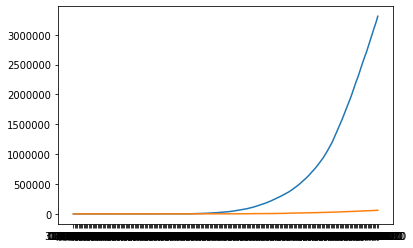

In [12]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

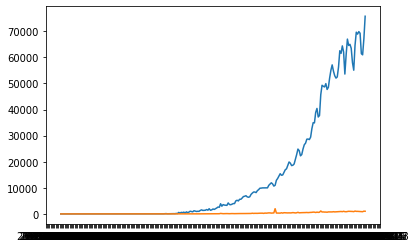

In [13]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

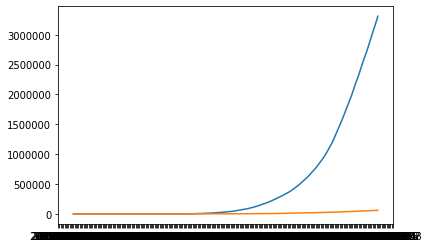

In [14]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_cumulative.png")

In [15]:
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
17065,31/12/2019,0,0,India,Asia,NaN
17064,01/01/2020,0,0,India,Asia,NaN
17063,02/01/2020,0,0,India,Asia,NaN
17062,03/01/2020,0,0,India,Asia,NaN
17061,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
16830,23/08/2020,69239,912,India,Asia,65.275059
16829,24/08/2020,61408,836,India,Asia,65.227051
16828,25/08/2020,60975,848,India,Asia,65.766710
16827,26/08/2020,67151,1059,India,Asia,66.219573


In [16]:
India.to_csv("India_covid.csv", index=False)

In [17]:
India_covid = pd.read_csv("India_covid.csv")
India_covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,India,Asia,NaN
1,01/01/2020,0,0,India,Asia,NaN
2,02/01/2020,0,0,India,Asia,NaN
3,03/01/2020,0,0,India,Asia,NaN
4,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
235,23/08/2020,69239,912,India,Asia,65.275059
236,24/08/2020,61408,836,India,Asia,65.227051
237,25/08/2020,60975,848,India,Asia,65.766710
238,26/08/2020,67151,1059,India,Asia,66.219573


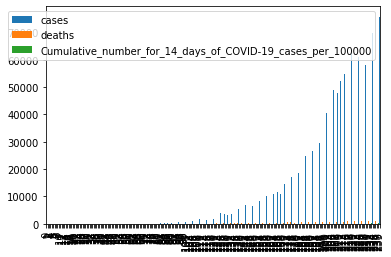

In [18]:
India_covid.plot.bar()

In [19]:
India_covid.drop("country",axis=1,inplace=True)
India_covid.drop("continent",axis=1,inplace=True)
India_covid

,date,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,NaN
1,01/01/2020,0,0,NaN
2,02/01/2020,0,0,NaN
3,03/01/2020,0,0,NaN
4,04/01/2020,0,0,NaN
...,...,...,...,...
235,23/08/2020,69239,912,65.275059
236,24/08/2020,61408,836,65.227051
237,25/08/2020,60975,848,65.766710
238,26/08/2020,67151,1059,66.219573


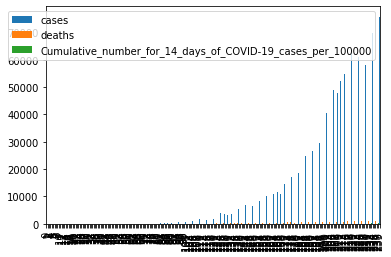

In [20]:
India_covid.plot.bar()

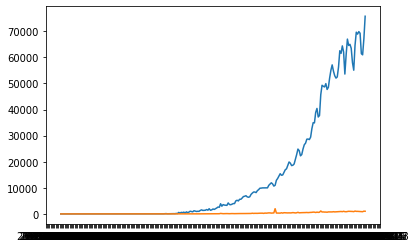

In [21]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_daily.png")

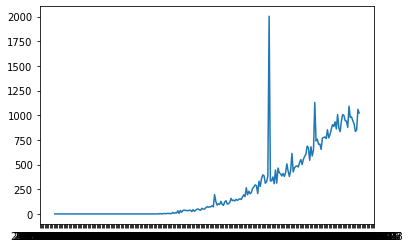

In [22]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
#y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
#plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("deaths_daily.png")

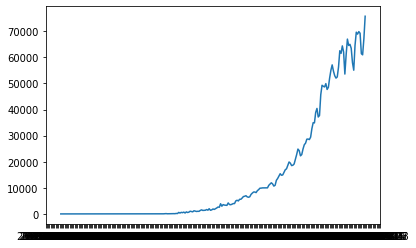

In [23]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
#z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
#plt.plot(x_values, z_values)
plt.savefig("cases_daily.png")